In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


# Data Analysis and visualization


In [2]:
# Takes all library
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')

1. checking first five records
2. checking last five records
3. checking shape
4. cheaking null values
5. checking all columns name


In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
df.shape

(1000, 17)

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**There is no null value so data is good**

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Exploratory data analysis

In [9]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


<AxesSubplot:>

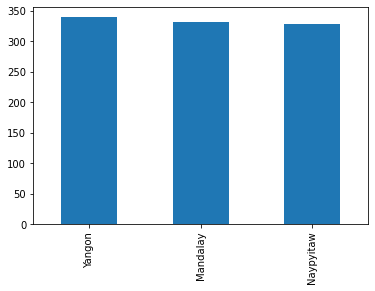

In [10]:
# which city has more customer
df['City'].value_counts().plot(kind='bar')

In [11]:
#Which customer has done lots of shopping in the supermarket
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

<AxesSubplot:>

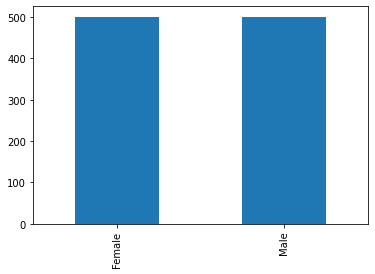

In [12]:
df['Gender'].value_counts().plot(kind='bar')

In [13]:
# Finding which customers has buy which type of products
gender_dummies=pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [14]:
df=pd.concat([df,gender_dummies],axis=1)

In [15]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,1,0


<AxesSubplot:xlabel='Product line', ylabel='Female'>

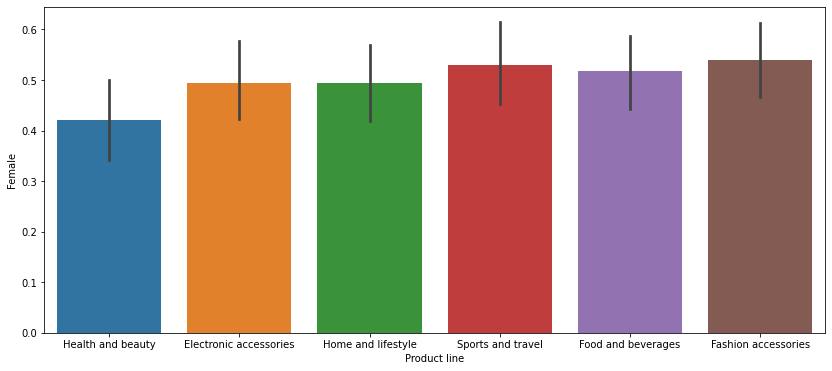

In [16]:
plt.figure(figsize=(14,6))
sns.barplot(x='Product line',y='Female',data=df)

<AxesSubplot:xlabel='Product line', ylabel='Male'>

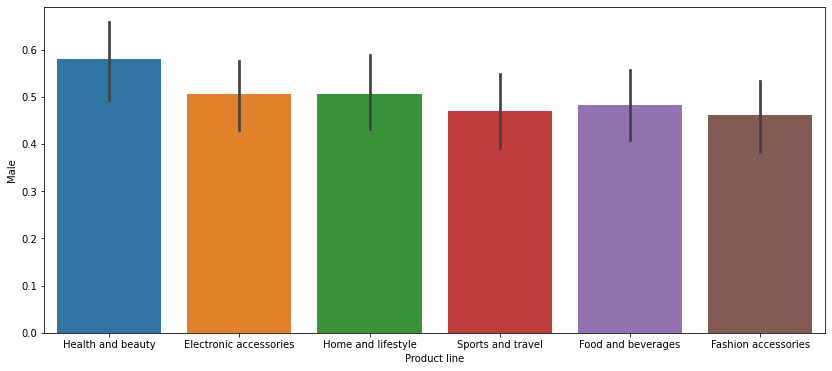

In [17]:
plt.figure(figsize=(14,6))
sns.barplot(x='Product line',y='Male',data=df)

In [18]:
# Payment method
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [19]:
df['Payment'].value_counts().keys()

Index(['Ewallet', 'Cash', 'Credit card'], dtype='object')

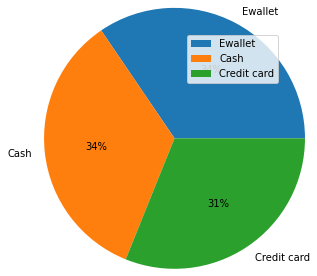

In [20]:
plt.pie(df['Payment'].value_counts(),labels=df['Payment'].value_counts().keys(),autopct='%1.0f%%',radius=1.5)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

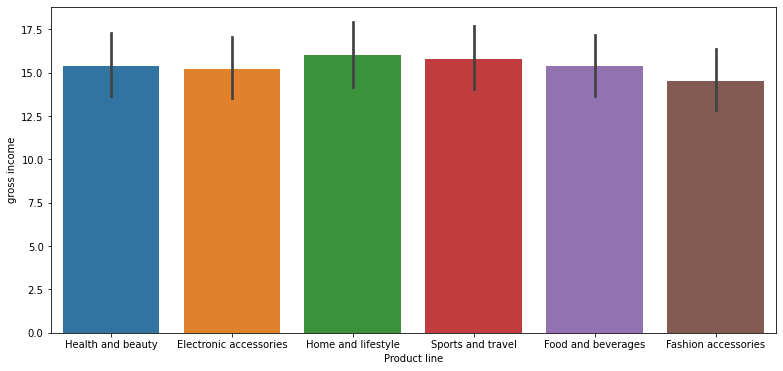

In [21]:
#**Getting gross income plot for each product line.**
#**Which product lines earning the most profits**

plt.figure(figsize=(13,6))
sns.barplot(x="Product line",y="gross income",data=df)

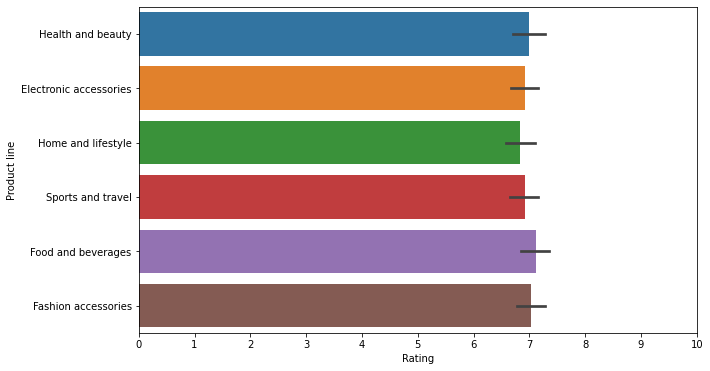

In [22]:
#find rating
xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,6))
sns.barplot(y=df['Product line'],x=df['Rating'])
plt.xticks(xdata)
plt.show()

<AxesSubplot:xlabel='Total', ylabel='Product line'>

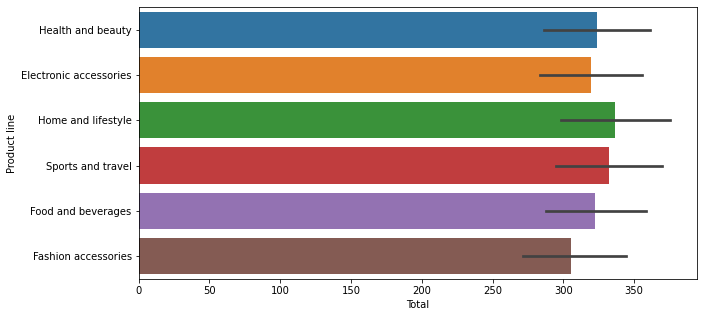

In [23]:
#salling price
plt.figure(figsize=(10,5))
sns.barplot(y='Product line',x='Total',data=df)

In [24]:
# Quantity
df['Quantity'].value_counts()

10    119
1     112
4     109
5     102
7     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

In [25]:
data2=pd.DataFrame(df['Quantity'].value_counts())

In [26]:
data2

,Quantity
10,119
1,112
4,109
5,102
7,102
6,98
9,92
2,91
3,90
8,85


<AxesSubplot:ylabel='Quantity'>

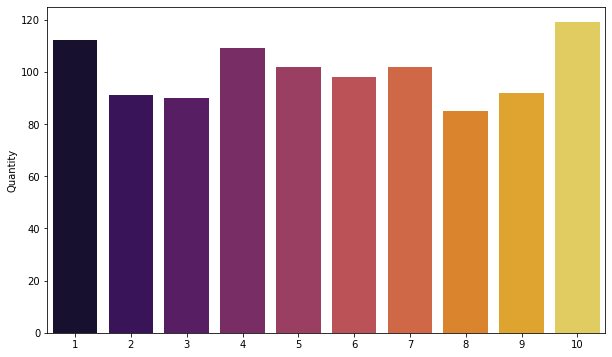

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=data2.index,y=data2['Quantity'],palette='inferno')

**10 quantites are sold most**

# Result of Analysis

* Total Customers = 1000
* Total Females = 501
* Total Males = 499
* Min Rating = 4
* Max Rating = 10
* Average Rating = 6.97
* Best Average Rating in Food & Beverages
* Max Average Gross Income in Home & Lifestyle
* Min Average Gross Income in Fashion Accessories
* Maximum customers buys 10 quantities
* Max Average total bill in Home and lifestyle
* Min Average total bill in Fashion Accessories
* Maximum People pays through e-wallet
* Maximum people comes from Yangon City
* Max Average Sales of Fashion Accessories is from Females
* Max Average Sales of Health & Beauty is from Males